# Predict Heart Disease using Machine Learning

This notebook looks into various python based machine learning and python based libraries in an attempt to build a machine learning model capable of predicting whether or not a person has heart disease based on his medical records 

## Process to be followed:

1. problem definition
2. Data
3. Evaluation
4. Features
5. modelling
6. Exprimentation

## 1. Problem Defifnition

Given the clinical attributes of a patient , need to find if the patient has a heart disease or not

## 2. Data

The original Data came from cleveland data from UCI machine learning repository
UCI Machine Learning Repository: Heart Disease Data Set
https://archive.ics.uci.edu/ml/datasets/heart+disease



## 3.Evaluation

>If we can reach 95% accuracy while predicting whether or not patient has heart disease
during proof of concept , we can persue this project

## 4.Features

This is where you get information on Features of your data set

**Making data dictionary**

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
> Value 1: typical angina
* 
> Value 2: atypical angina
* 
> Value 3: non-anginal pain
* 
> Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the 
hospital)
* chol: serum cholestoral in mg/dl'
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: resting electrocardiographic results
> Value 0: normal
* 
> Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* 
> Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
> Value 1: upsloping
* 
> Value 2: flat
* 
> Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy (for calcification of vessels)
* thal: results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)
* num: target variable representing diagnosis of heart disease (angiographic disease status) in any major vessel
> Value 0: < 50% diameter narrowing
* 
> Value 1: > 50% diameter narrowing

## Use numpy ,pandas and matplotlib for data analasys and manipulation

In [1]:
# Import all tools required

# general libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score


# Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
# know more about the data that you are working with

## Data Exploration

1. What question are you trying to solve
2. What kind of data do we have and how do we treat different datatypes
3. Whats missing from data and how do you deal with it
4. Where are your outliners and why do you care about them
5. How do you add , change or remove features from dataset to get more out of it

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#how many of each class of target label present (0 and 1's)
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

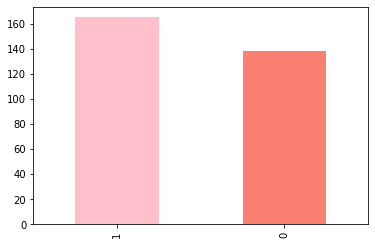

In [8]:
# in a bar plot legend contains each column values
df["target"].value_counts().plot(kind="bar",color=["pink","salmon"])

In [9]:
df.isna().sum() # check missing value count in each feature

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency wrt sex

In [11]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


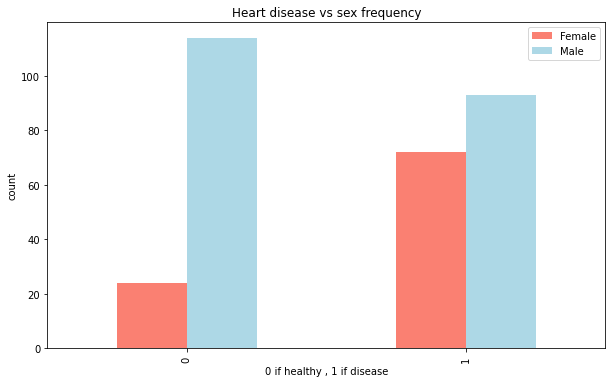

In [13]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",figsize=(10,6),
                                         color=["salmon","lightblue"])
plt.legend(["Female","Male"])
plt.xlabel("0 if healthy , 1 if disease")
plt.ylabel("count")
plt.title("Heart disease vs sex frequency");

In [14]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# Age vs Max heart rate for heart disease

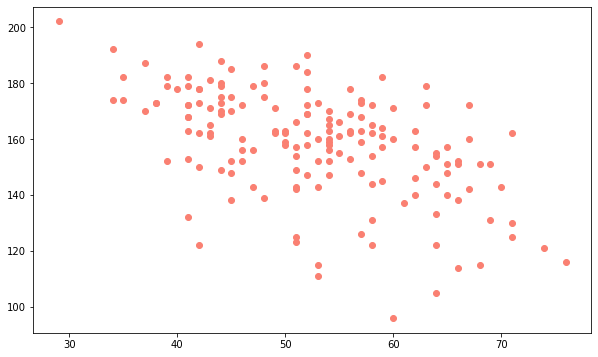

In [15]:
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(x=df.age[df["target"]==1],y=df.thalach[df["target"]==1],c="salmon")

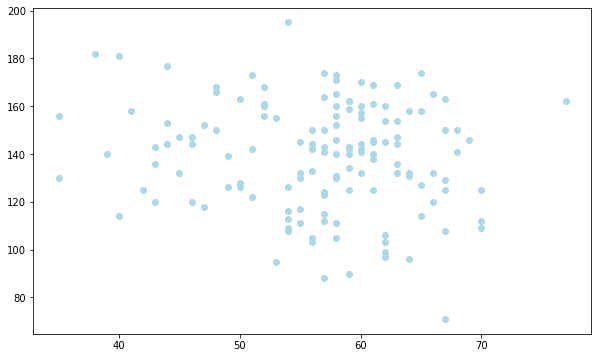

In [16]:
plt.figure(figsize=(10,6))

#scatter with negitive examples
plt.scatter(x=df.age[df["target"]==0],y=df.thalach[df["target"]==0],c="lightblue")

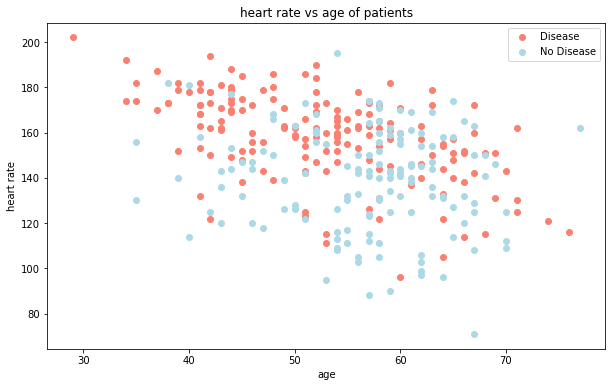

In [17]:
# combining both

plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(x=df.age[df["target"]==1],y=df.thalach[df["target"]==1],c="salmon")


#scatter with negitive examples
plt.scatter(x=df.age[df["target"]==0],y=df.thalach[df["target"]==0],c="lightblue")


#helpful info

plt.title("heart rate vs age of patients")
plt.xlabel("age")
plt.ylabel("heart rate")
plt.legend(["Disease","No Disease"])

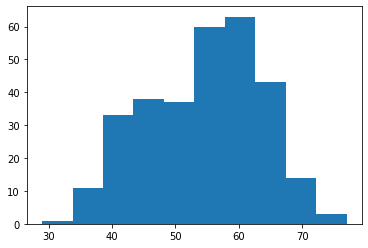

In [18]:
#check distribution of age column using histogram

plt.hist(x=df.age);

# Heart disease frequency per chest pain

1. cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


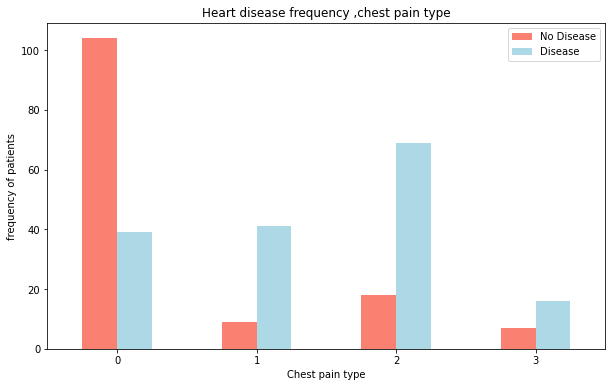

In [20]:
#make more visible
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart disease frequency ,chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("frequency of patients")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# corelation matrix (Relation bw the non related features)

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


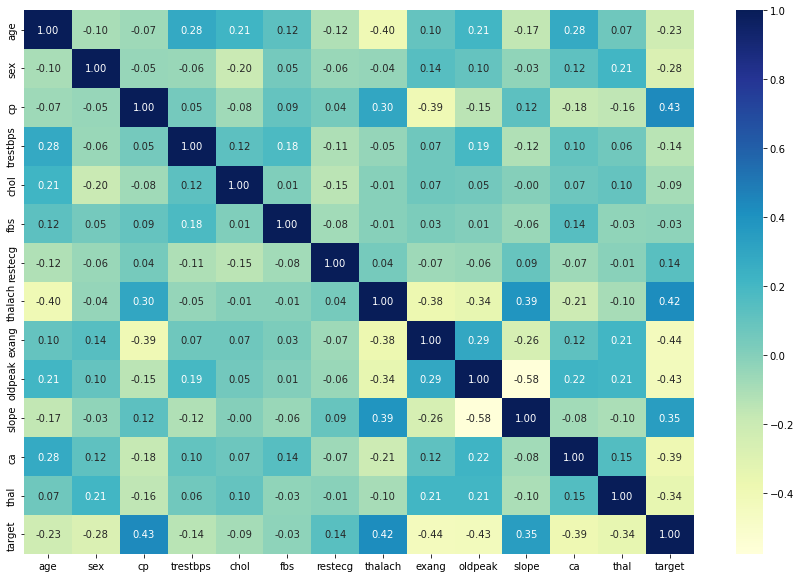

In [23]:
# Making corelation matrix more prettier (Heat map)
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,cbar=True,fmt=".2f",cmap="YlGnBu")

* positive corelation : Value of variable change togehter
* negitive corelation : Value of variable change in opposite direction

# 5.Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# split data into X and Y

X = df.drop("target",axis=1)

y = df["target"]

# split into train and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2)

Now its time to select and impliment the right model

and train it to find patterns

then test it on new data

we are going to try 3-diff ml models

1. logistic regression
2. kneighbors classifiction
3. Random forest classsifier

In [27]:
# put models in a dictionary

models = {"Logistic Regression":LogisticRegression(),
             "KNeighbors classifier":KNeighborsClassifier(),
                 "Random Forest Classification":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Here we fit and test the data using sklearn models
    X_train: training data(no labels)
    X_test: values to be tested
    y_train: training data
    y_test: actual"""
    #Set random seed
    np.random.seed(42)
    #make a disctionary to store model scores
    model_score = {}
    for name,model in models.items():
        #fit model to data 
        model.fit(X_train,y_train)
        #Evaluate the model and append it into model_score
        model_score[name]=model.score(X_test,y_test)
    return model_score


In [28]:
model_score = fit_and_score(models,X_train,X_test,y_train,y_test)

model_score

/Users/gowrijaswanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNeighbors classifier': 0.6885245901639344,
 'Random Forest Classification': 0.8360655737704918}

<AxesSubplot:>

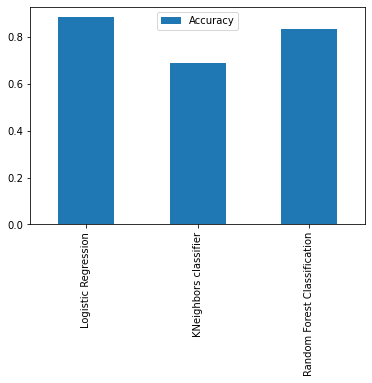

In [36]:
model_compare = pd.DataFrame(model_score, index=["Accuracy"])
model_compare.T.plot.bar()